In [1]:
#In this Data Project we will be looking at data from the 2012 election.

# Dataset #1: Polling dataset
# Dataset #2: Donor dataset

# The first data set will be the results of political polls.
# We will analyze this aggregated poll data and answer some questions:

#1.) Who was being polled and what was their party affiliation?
#2.) Did the poll results favor Romney or Obama?
#3.) How do undecided voters effect the poll?
#4.) Can we account for the undecided voters?
#5.) How did voter sentiment change over time?
#6.) Can we see an effect in the polls from the debates?

In [2]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Import divison from 'future' (only for Python 2)
from __future__ import division

In [3]:
# 2 new modules: Request and StringIO

# Request module can be used to import data from web
# Request is an API for gathering information from the web

# StringIO module allows me to read the file in the pandas data frame
# Use StringIO to work with the csv file, the DataFrame will require a .read() method

In [4]:
import requests

from StringIO import StringIO

In [5]:
# Grab data from URL

# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use request to get info in text form
source = requests.get(url).text

# helps to avoid string IO error
poll_data = StringIO(source)

In [6]:
#Set data as Dataframe

poll_df = pd.read_csv(poll_data)

In [7]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [8]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


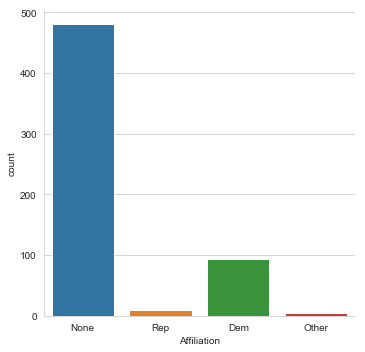

In [9]:
#Factor Plot for affiliation

sns.catplot('Affiliation',data=poll_df, kind='count')

In [10]:
# Keep in mind that there are more polls associated with Democats 

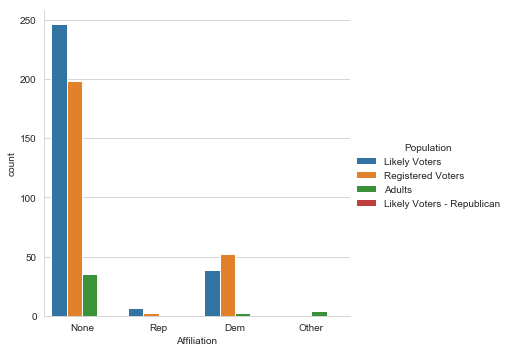

In [11]:
#Factor Plot for affiliation with population subjset

sns.catplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [12]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [13]:
# Average of Obama and Romney for the Undecided poll people

# Take the average of all values in current data frame
avg = pd.DataFrame(poll_df.mean())

# Drop number of observations column
avg.drop('Number of Observations', axis = 0, inplace=True)

In [14]:
# Standard Deviation

std = pd.DataFrame(poll_df.std())

# Set axis = 0 because it is a row

# Let's get the error
std.drop('Number of Observations', axis=0, inplace=True)

In [15]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [16]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


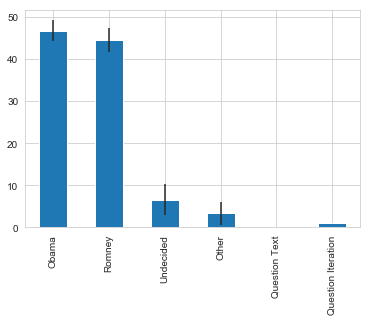

In [17]:
# Plot average dataframe

# Average of all the polls
avg.plot(yerr=std ,kind='bar',legend=False)

In [18]:
# Obama had about 47% of the votes and Romeny had a little less

In [19]:
# Look at numbers for undecided factor 
# Concatenate our Average and Std DataFrames

poll_avg = pd.concat([avg,std],axis=1)
poll_avg

,0,0
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


In [20]:
#Update names of column

poll_avg.columns=['Average','STD']

In [21]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


In [22]:
# Average for the each candidate is pretty close
# What about undecided people?
# We will split it evenly between two candidates
# The observed difference should be an unbiased estimate of the final diff.

In [23]:
# Create a timeseries analysis 

In [24]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


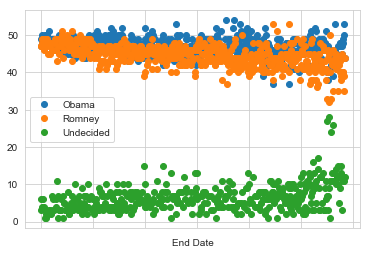

In [25]:
# Plot the Obama, Romney, and Undecided voters over time

poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [26]:
# # Quick plot of sentiment in the polls versus time.

In [27]:
# To get dates to appear on x-axis convert the 'End Date' variable from string to Timestamp

from datetime import datetime

poll_df['End Date'] = poll_df['End Date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

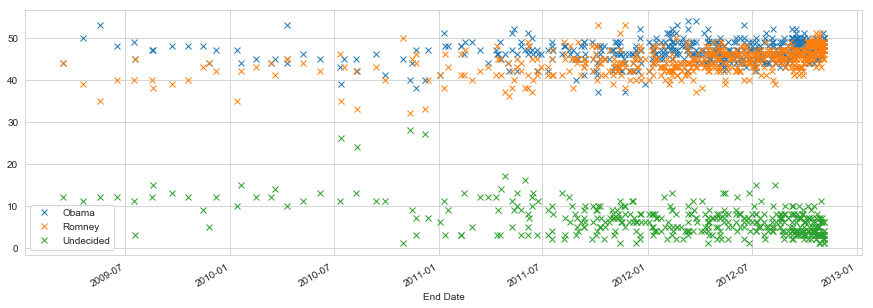

In [28]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='x', figsize=(15,5))

In [29]:
# The trend of undecided voters (green) 
# start to go down the close to the election because they chose a candidate

# Obama and Romney gets closer to each other they closer we get to the election


In [30]:
# Plot the % difference between Obama and Romeny as Time goes on

In [31]:
#Use datetime module as a timestamp

from datetime import datetime

In [32]:
# Create new column
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [33]:
# Positive difference means leaning toward Obama 
# Negative difference mean leaning toward Romney

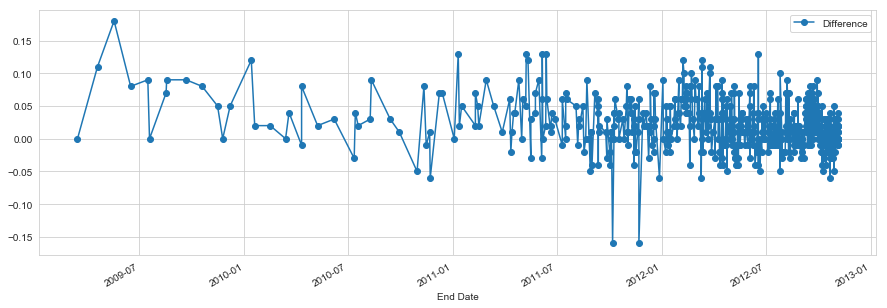

In [34]:
# Plot % Difference in favor (self-made plot)

poll_df.plot(x='End Date',y='Difference',linestyle='-',marker='o', figsize=(15,5))


In [35]:
# Visualize sentiment in difference changes over time

#Approach:
    # Use groupby to group polls by their start date
    # Sort it by the start date

In [36]:
#Grab dataframe and group by start date
#.asindex=False keeps the current index in original data frame
# if it is set to True, the start date will be the index
# .mean() takes the mean of all the poll results on the start date

poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


In [37]:
# I am taking the average of all the polls by each start date and the difference column

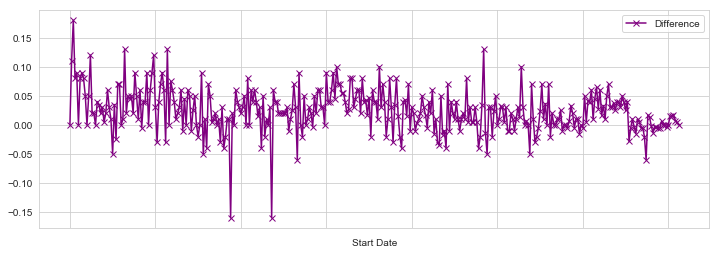

In [38]:
# Plot % Difference v. Time

poll_df.plot('Start Date','Difference',figsize=(12,4),
             marker='x',linestyle='-',color='purple')

In [39]:
poll_df['Start Date'] = poll_df['Start Date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

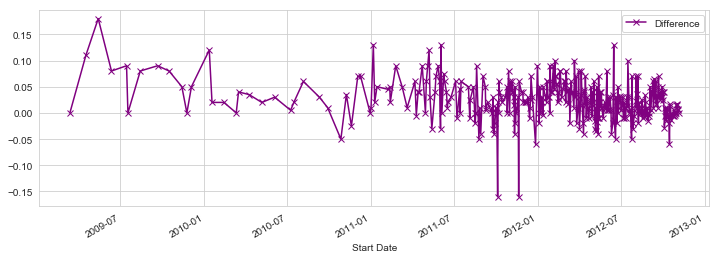

In [40]:
# Plot % Difference v. Time

poll_df.plot('Start Date','Difference',figsize=(12,4),
             marker='x',linestyle='-',color='purple')

In [41]:
# Obama was a favorite for most of the year in 2009 - 2011
# Romeny began to take the lead as the favorite in end of 2011 - beginning of 2012

# Something happened on the 2 days were poll spiked in favor of romney
# Investigate at a later time

In [42]:
# We will plot lines for when the debates took place
# The debate dates were Oct 3rd, Oct 11, and Oct 22nd. 
# Let's plot some lines as markers and then zoom in on the month of October.

In [43]:
# In order to find where to set the x limits for the figure
# we need to find out where the index for the month of October

In [44]:
'''# Set row count and xlimit list
row_in = 0
xlimit = []

# I will cycle through index until it find 2012-10 (October)
for date in poll_df['Start Date']:
    #cycle through index. if the date in the start date = 2012-10
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1 #row_in counts the index row as it goes through for loop
    else: 
        row_in +=1
        
        
print (min(xlimit))
print (max(xlimit))'''

"# Set row count and xlimit list\nrow_in = 0\nxlimit = []\n\n# I will cycle through index until it find 2012-10 (October)\nfor date in poll_df['Start Date']:\n    #cycle through index. if the date in the start date = 2012-10\n    if date[0:7] == '2012-10':\n        xlimit.append(row_in)\n        row_in += 1 #row_in counts the index row as it goes through for loop\n    else: \n        row_in +=1\n        \n        \nprint (min(xlimit))\nprint (max(xlimit))"

In [45]:
#Great now we know where to set our x limits for the month of October in our figure.
#329 and 356

In [46]:
'''#Plot the start date vs. difference with x limits

fig = poll_df.plot('Start Date','Difference',figsize=(12,4),
                   marker='o',linestyle='-',color='purple',
                   xlim=(329,356))

# Add the debate markers for month of october

# Oct 3d
plt.axvline(x=329+2, linewidth=4, color='grey')
# Oct 11th
plt.axvline(x=329+10, linewidth=4, color='grey')
# Oct 22nd
plt.axvline(x=329+21, linewidth=4, color='grey')'''

"#Plot the start date vs. difference with x limits\n\nfig = poll_df.plot('Start Date','Difference',figsize=(12,4),\n                   marker='o',linestyle='-',color='purple',\n                   xlim=(329,356))\n\n# Add the debate markers for month of october\n\n# Oct 3d\nplt.axvline(x=329+2, linewidth=4, color='grey')\n# Oct 11th\nplt.axvline(x=329+10, linewidth=4, color='grey')\n# Oct 22nd\nplt.axvline(x=329+21, linewidth=4, color='grey')"

In [47]:
# Plot above is incorrect. For correct graph, visit General Notes in Drive

In [48]:
# DONOR DATA SET

In [49]:
#The questions we will be trying to answer while looking at this Data Set is:

#1.) How much was donated and what was the average donation?
#2.) How did the donations differ between candidates?
#3.) How did the donations differ between Democrats and Republicans?
#4.) What were the demographics of the donors?
#5.) Is there a pattern to donation amounts?

In [50]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\ronald.a.daley\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [52]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [53]:
# Dataframe with over 1M rows

In [54]:
# Count the number of donations

donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [55]:
# Most common donation is $100 and then $50, etc...

In [56]:
# Max Donated
donor_df['contb_receipt_amt'].max()

2014490.51

In [57]:
# Average and STD of donation

don_mean = donor_df['contb_receipt_amt'].mean()

don_std = donor_df['contb_receipt_amt'].std()


In [58]:
don_mean

298.2351500951093

In [59]:
don_std

3749.666723269043

In [60]:
# %.2f mean 2 points after decimal
# call 'f' because it is a floating point number

print 'The average donation was $%.2f with a std $%.2f' %(don_mean,don_std)

The average donation was $298.24 with a std $3749.67


In [61]:
#Make a Series

top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values(ascending=True, inplace=True)

top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [62]:
# Negative values are the refunds in the contribution receipt amount
# Get rid of negative refund values

In [63]:
top_donor = top_donor[top_donor>0]

top_donor.sort_values()

334504          0.01
321779          0.01
323547          0.01
325614          0.01
326100          0.01
325982          0.01
318560          0.01
325986          0.01
325429          0.01
323822          0.01
348154          0.01
329984          0.01
320749          0.01
320784          0.01
326053          0.01
325758          0.01
317753          0.01
325344          0.01
323661          0.01
319373          0.01
321025          0.01
326172          0.01
336020          0.01
335424          0.01
345103          0.01
323823          0.01
320309          0.01
325975          0.01
325973          0.01
321676          0.01
             ...    
99829       10000.00
709268      10000.00
708928      10000.00
710730      10000.00
709813      10000.00
41888       10000.00
708138      10000.00
923476      10000.00
709739      10000.00
708919      10000.00
709608      10000.00
876244      10000.00
710177      10000.00
708898      10000.00
708022      10000.00
711167      10000.00
710198      1

In [64]:
# View the top 10 most common donations without negative values

top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [65]:
# A quick question we could verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100,500 etc.) 
# We can quickly visualize this by making a histogram and checking for peaks at those values. 
# Let's go ahead and do this for the most common amounts, up to 2500 dollars.


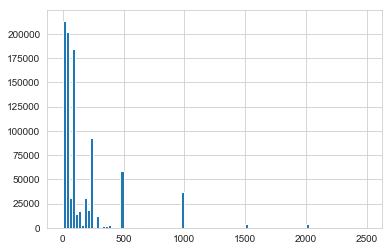

In [66]:
# Create a Series of common donations limited to 2500
com_don = top_donor[top_donor<2500]

# Call Histogram for donation amount from 0 to 
com_don.hist(bins=100)

In [67]:
# We see the peak at round number values, which means our intuition was right, since we spikes at the round numbers
# People are more inclinded to donate round number values

In [68]:
# Separate Donations by Party

# Create a new party column by separating candates by affiliation

# Grab the unique object from the candidate column
candidates = donor_df.cand_nm.unique()

candidates


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [69]:
# Separate Democrats (Obama) from Republicans

# 2 ways to build party column:
    # Use a map and dictionary(Easy but long)
    # For Loop(hard but short)

# Method #1 - Mapping: (Easy but long)

# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [70]:
# Method #2 - For Loop:
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [71]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [72]:
# Only view donors with the contribution amount > 0
donor_df = donor_df[donor_df.contb_receipt_amt>0]

In [73]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [74]:
# Aggregate the data by candidate

# Total # of donations per candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

# Groupby candidates and display contb_receipt column count

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [75]:
# Total $ amount donated per candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [76]:
# Update presentation
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print 'The candidate %s raise %.0f dollars' %(cand_amount.index[i],don)
    print ''
    i +=1

The candidate Bachmann, Michelle raise 2711439 dollars

The candidate Cain, Herman raise 7101082 dollars

The candidate Gingrich, Newt raise 12832770 dollars

The candidate Huntsman, Jon raise 3330373 dollars

The candidate Johnson, Gary Earl raise 566962 dollars

The candidate McCotter, Thaddeus G raise 39030 dollars

The candidate Obama, Barack raise 135877427 dollars

The candidate Paul, Ron raise 21009620 dollars

The candidate Pawlenty, Timothy raise 6004819 dollars

The candidate Perry, Rick raise 20305754 dollars

The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars

The candidate Romney, Mitt raise 88335908 dollars

The candidate Santorum, Rick raise 11043159 dollars



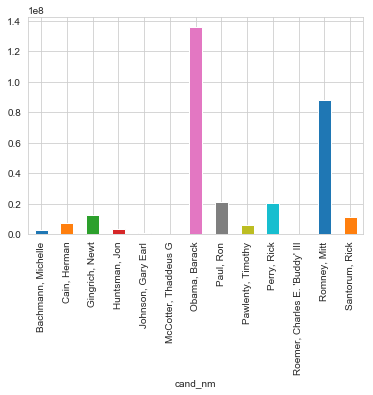

In [77]:
# Graphic Presentation of donation amounts

cand_amount.plot(kind='bar')

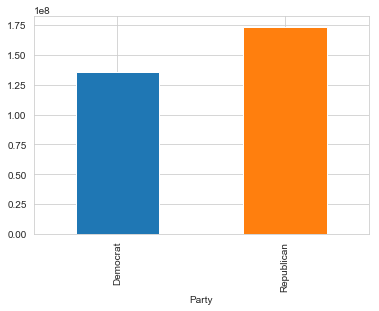

In [78]:
# Compare total donation of democrat v. republican

donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [79]:
# View donations and who they came from

#Finally to start closing out the project,
#let's look at donations and who they came from (as far as occupation is concerned). 
#We will start by grabing the occupation information from the dono_df DataFrame 
#and then using pivot_table to make the index defined by the various occupations 
#and then have the columns defined by the Party (Republican or Democrat). 
#FInally we'll also pass an aggregation function in the pivot table, 
#in this case a simple sum function will add up all the comntributions by anyone with the same professio

In [80]:
# Use a pivot table to extract and organize the data by the donor occupation

occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index='contbr_occupation',
                                     columns='Party',
                                     aggfunc='sum')

occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [81]:
occupation_df.shape

(45067, 2)

In [82]:
#This is too large to plot
# Set cutoff at $1M or more

In [83]:
# View which groups donated more than $1M

occupation_df = occupation_df[occupation_df.sum(1)>1000000]

In [84]:
occupation_df.shape

(31, 2)

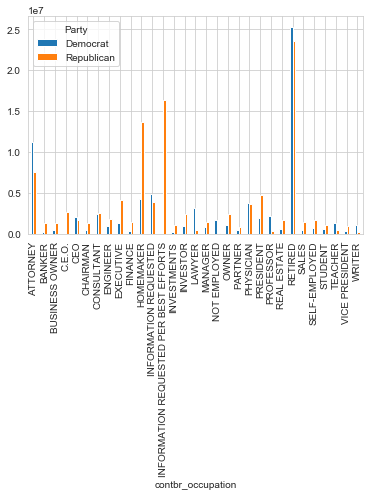

In [85]:
occupation_df.plot(kind='bar')

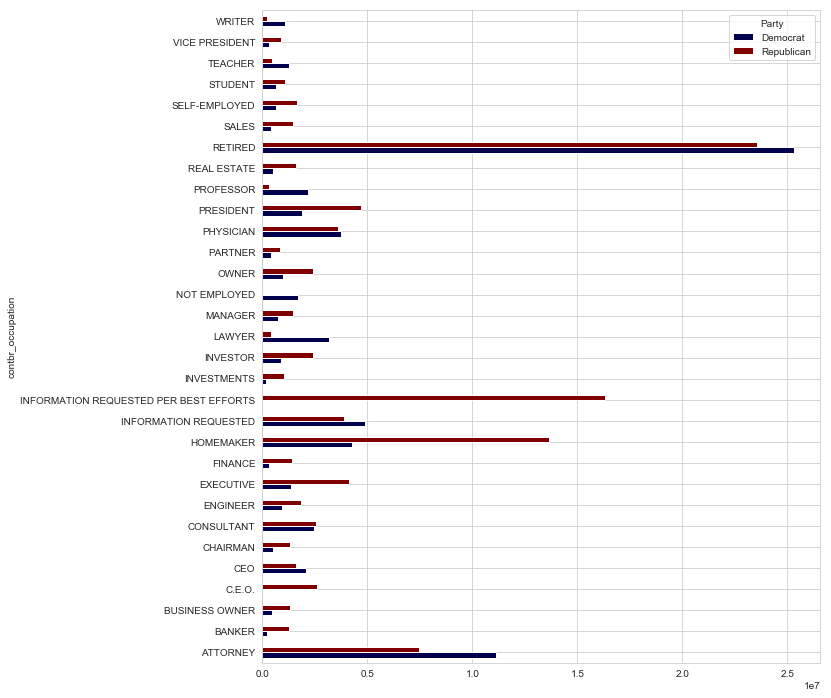

In [87]:
# View horizontally

occupation_df.plot(kind='barh', figsize=(10,12), cmap='seismic')

In [88]:
# Remove "information Requested per best efforts" & "Information Requested"
# Group CEO and C.E.O

In [89]:
# Drop unavailable occupations

#axis = 0 because index values
#inplace = True makes changes permanent

occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS',
                    'INFORMATION REQUESTED'], axis=0,
                  inplace=True)

In [91]:
# Group CEO and C.E.O

occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

In [93]:
occupation_df.drop('C.E.O.',inplace = True)

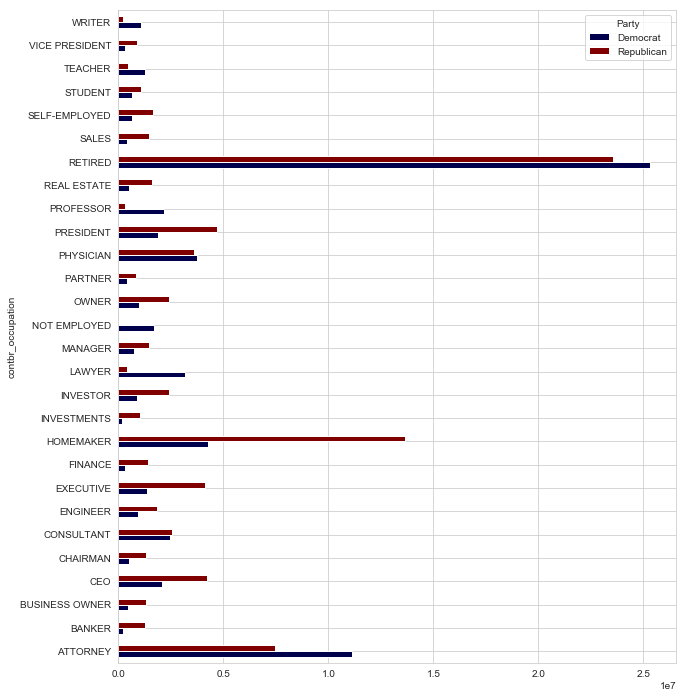

In [94]:
# View plot with updates
occupation_df.plot(kind='barh', figsize=(10,12), cmap='seismic')